# Practice Session 04: Weighted Networks


In this session we will reconstruct the World Trade Web by using [NetworkX](https://networkx.github.io/), a Python package. This practice is inspired by a paper analysing the Topology of the World Trade Web (https://arxiv.org/abs/cond-mat/0301015).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2012-flows.csv`` international trade in 2012
* ``trade-2022-flows.csv`` international trade in 2022
* ``trade-countries.csv`` list of countries and territories

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories. 

This is a comma-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# Leave this cell as-is

INPUT_NAMES_FILENAME = "trade-countries.csv"
INPUT_TRADE_OLD = "trade-2012-flows.csv"
YEAR_OLD = 2012
INPUT_TRADE_NEW = "trade-2022-flows.csv"
YEAR_NEW = 2022

In [3]:
id2name = {}

<font size="+1" color="red">Replace this cell with your code to read country names into id2name.</font>

Test the mapping using the following code.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [6]:
# LEAVE AS-IS, it should print "Norway"

print(id2name["NOR"])

Norway


# 2. Read flows data into two graphs

## 2.1. Read amount traded

The files `INPUT_TRADE_OLD` and `INPUT_TRADE_NEW` contain three columns:

* from (country from which the goods or services are exported)
* to (country that receives the goods or services)
* amount (total amount in USD)

Read the graphs as directed graphs into variables `gOld` and `gNew` respectively.

You can create an empty graph using:

```python
g = nx.DiGraph()
```

By default the columns read by a DictReader are string, but you can convert the column containing the amount exported to a floating point number by using `float()`. Divide the `amount` by one million and round to the nearest integer, so the weights will be expressed in millions of dollars.

To add a weighted edge in *g* from node *u* to node *v* with weight *w*, use `g.add_edge(u, v, weight=w)`.

**Important:** create only the nodes corresponding to countries listed in ``INPUT_NAMES_FILENAME`` (keys in ``id2name``)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to read the two graphs: ``gOld`` and ``gNew``.</font>

The following should print:

```
The 2012 graph contains 33 nodes
The 2022 graph contains 33 nodes
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [8]:
# LEAVE AS-IS

print("The {:d} graph contains {:d} nodes".format(YEAR_OLD, gOld.number_of_nodes()))
print("The {:d} graph contains {:d} nodes".format(YEAR_NEW, gNew.number_of_nodes()))

The 2012 graph contains 33 nodes
The 2022 graph contains 33 nodes


The following should print:

```
In 2012, ESP (Spain) exported to SVK (Slovak Republic) goods and services for 777 USD millions
by 2022, it exported 1,548 USD millions

In 2012, ESP (Spain) exported to ITA (Italy) goods and services for 21,601 USD millions
by 2022, it exported 32,225 USD millions

In 2012, USA (United States) exported to SVK (Slovak Republic) goods and services for 333 USD millions
by 2022, it exported 376 USD millions

In 2012, USA (United States) exported to ITA (Italy) goods and services for 15,972 USD millions
by 2022, it exported 27,411 USD millions
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [9]:
# LEAVE AS-IS

for exporter in ["ESP", "USA"]:
    for importer in ["SVK", "ITA"]:
        print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services for {:,d} USD millions".format(
            YEAR_OLD, exporter, id2name[exporter], importer, id2name[importer],
               gOld.get_edge_data(exporter, importer)["weight"]) )

        print("by {:d}, it exported {:,d} USD millions".format(YEAR_NEW, gNew.get_edge_data(exporter, importer)["weight"]))
        print("")
    

In 2012, ESP (Spain) exported to SVK (Slovak Republic) goods and services for 777 USD millions
by 2022, it exported 1,548 USD millions

In 2012, ESP (Spain) exported to ITA (Italy) goods and services for 21,601 USD millions
by 2022, it exported 32,225 USD millions

In 2012, USA (United States) exported to SVK (Slovak Republic) goods and services for 333 USD millions
by 2022, it exported 376 USD millions

In 2012, USA (United States) exported to ITA (Italy) goods and services for 15,972 USD millions
by 2022, it exported 27,411 USD millions



## 2.2. Compute totals

Next, compute the total exports of each country, into two dictionaries: `exportsOld` and `exportsNew`, with keys being country codes, and values being total exports. Do the same with total imports, into variables `importsOld` and `importsNew`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To iterate through the edges of a graph, you can use:

```python
for u, v, d in g.edges(data=True):
    w = d['weight']
    # u is the source, v the destination, w the weight
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)` to avoid duplication. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".

    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to compute totals into dictionaries exportsOld, exportsNew, importsOld, importsNew. Create a function *sum_weights* to avoid code duplication.</font>

The following should print:

```
Poland exported 128,160 USD Million in 2010 and 271,095 USD Million in 2021 (growth 2.1x),
 and imported 136,333 USD Million in 2010 and 251,993 USD Million in 2021 (growth 1.8x).

Spain exported 192,362 USD Million in 2010 and 294,287 USD Million in 2021 (growth 1.5x),
 and imported 224,917 USD Million in 2010 and 279,927 USD Million in 2021 (growth 1.2x).

Chile exported 31,615 USD Million in 2010 and 35,069 USD Million in 2021 (growth 1.1x),
 and imported 24,462 USD Million in 2010 and 35,868 USD Million in 2021 (growth 1.5x).
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [11]:
# LEAVE AS-IS

for country in ['EST', 'ESP', 'TUR']:
    print("{:s} exported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x),".format(
        id2name[country],
        exportsOld[country], YEAR_OLD,
        exportsNew[country], YEAR_NEW,
        exportsNew[country]/exportsOld[country]
    ))
    print(" and imported {:,d} USD Million in {:d} and {:,d} USD Million in {:d} (growth {:.1f}x).".format(
        importsOld[country], YEAR_OLD,
        importsNew[country], YEAR_NEW,
        importsNew[country]/importsOld[country]
    ))
    print()

Estonia exported 10,082 USD Million in 2012 and 14,312 USD Million in 2022 (growth 1.4x),
 and imported 11,401 USD Million in 2012 and 10,463 USD Million in 2022 (growth 0.9x).

Spain exported 214,025 USD Million in 2012 and 313,679 USD Million in 2022 (growth 1.5x),
 and imported 208,224 USD Million in 2012 and 234,182 USD Million in 2022 (growth 1.1x).

Türkiye exported 66,536 USD Million in 2012 and 133,088 USD Million in 2022 (growth 2.0x),
 and imported 112,203 USD Million in 2012 and 110,220 USD Million in 2022 (growth 1.0x).



The code below, which you should use as-is, converts the imports and exports into a [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [12]:
# LEAVE AS-IS

sorted_countries = sorted(id2name.keys())

flowsData = {
    'expOld': [(exportsOld[c] if c in exportsOld else 0) for c in sorted_countries],
    'impOld': [(importsOld[c] if c in importsOld else 0) for c in sorted_countries],
    'expNew': [(exportsNew[c] if c in exportsNew else 0) for c in sorted_countries], 
    'impNew': [(importsNew[c] if c in importsNew else 0) for c in sorted_countries],
}

flowsDF = pd.DataFrame(flowsData, index=sorted_countries)
flowsDF

,expOld,impOld,expNew,impNew
AUS,71773,108802,97914,93347
AUT,130958,144673,177134,149509
BEL,244684,303104,383111,289290
CAN,393860,361999,531428,431171
CHE,204660,211169,273772,222134
CHL,34975,35969,33794,38953
CZE,133716,106840,214859,130849
DEU,1044010,836190,1284888,855477
DNK,86293,72924,85535,79871
ESP,214025,208224,313679,234182


# 3. Draw the exports graphs

Draw the two graphs using NetworkX. Define an auxiliary function named `plotGraph(graph, exports)` for this, and use it to plot both graphs.

You can adapt the following code snippet. If `g` is a NetworkX graph in which weights are expressed in the variable *weight*, the following layouts a graph using a spring model. The constants *NODE_SIZE_MULTIPLIER* and *EDGE_WIDTH_MULTIPLIER* should be numbers smaller than one used to reduce the node sizes and edge widths to a manegeable size (set by trial and error, start from 0.01 but for both but modify them individually until the graph looks good).

```python
def plotGraph(g,exports):

    plt.figure(figsize=(20,12))
    
    # Compute node sizes as a function of total exports
    node_sizes = []
    for node in g.nodes():
        node_sizes.append(exports[node] * NODE_SIZE_MULTIPLIER)

    # Compute edge widths as a function of exports
    edge_widths = []
    for u, v, d in g.edges(data=True):
        weight = math.log(d['weight']) * EDGE_WIDTH_MULTIPLIER
        edge_widths.append(weight)
        
    # Determine node positions
    pos = nx.spring_layout(g, iterations=100, weight="weight")
    
    # Draw nodes
    nx.draw_networkx_nodes(g, pos, node_color="orange", node_size=node_sizes)

    # Draw edges
    nx.draw_networkx_edges(g, pos, width=edge_widths, )

    # Draw labels and display graph
    _ = nx.draw_networkx_labels(g, pos, font_color="purple")
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to plot the two graphs.</font>

<font size="+1" color="red">Replace this cell with (1) a brief commentary on what are the similarities and differences you observe between these two graphs and (2) the answer to the following: identify and discuss any 3 countries that serve as major trade hubs. How consistent are their positions across both years, and what might this indicate about their roles in international trade?</font>

# 4. Comparison of export and import scores

Now, we will countries' imports and exports.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*. **Do not forget to filter out cases where values of *a* or *b* are 0**:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your function *plot_scatter*.
**Do not forget to filter out before cases where values of *a* or *b* are 0**</font>

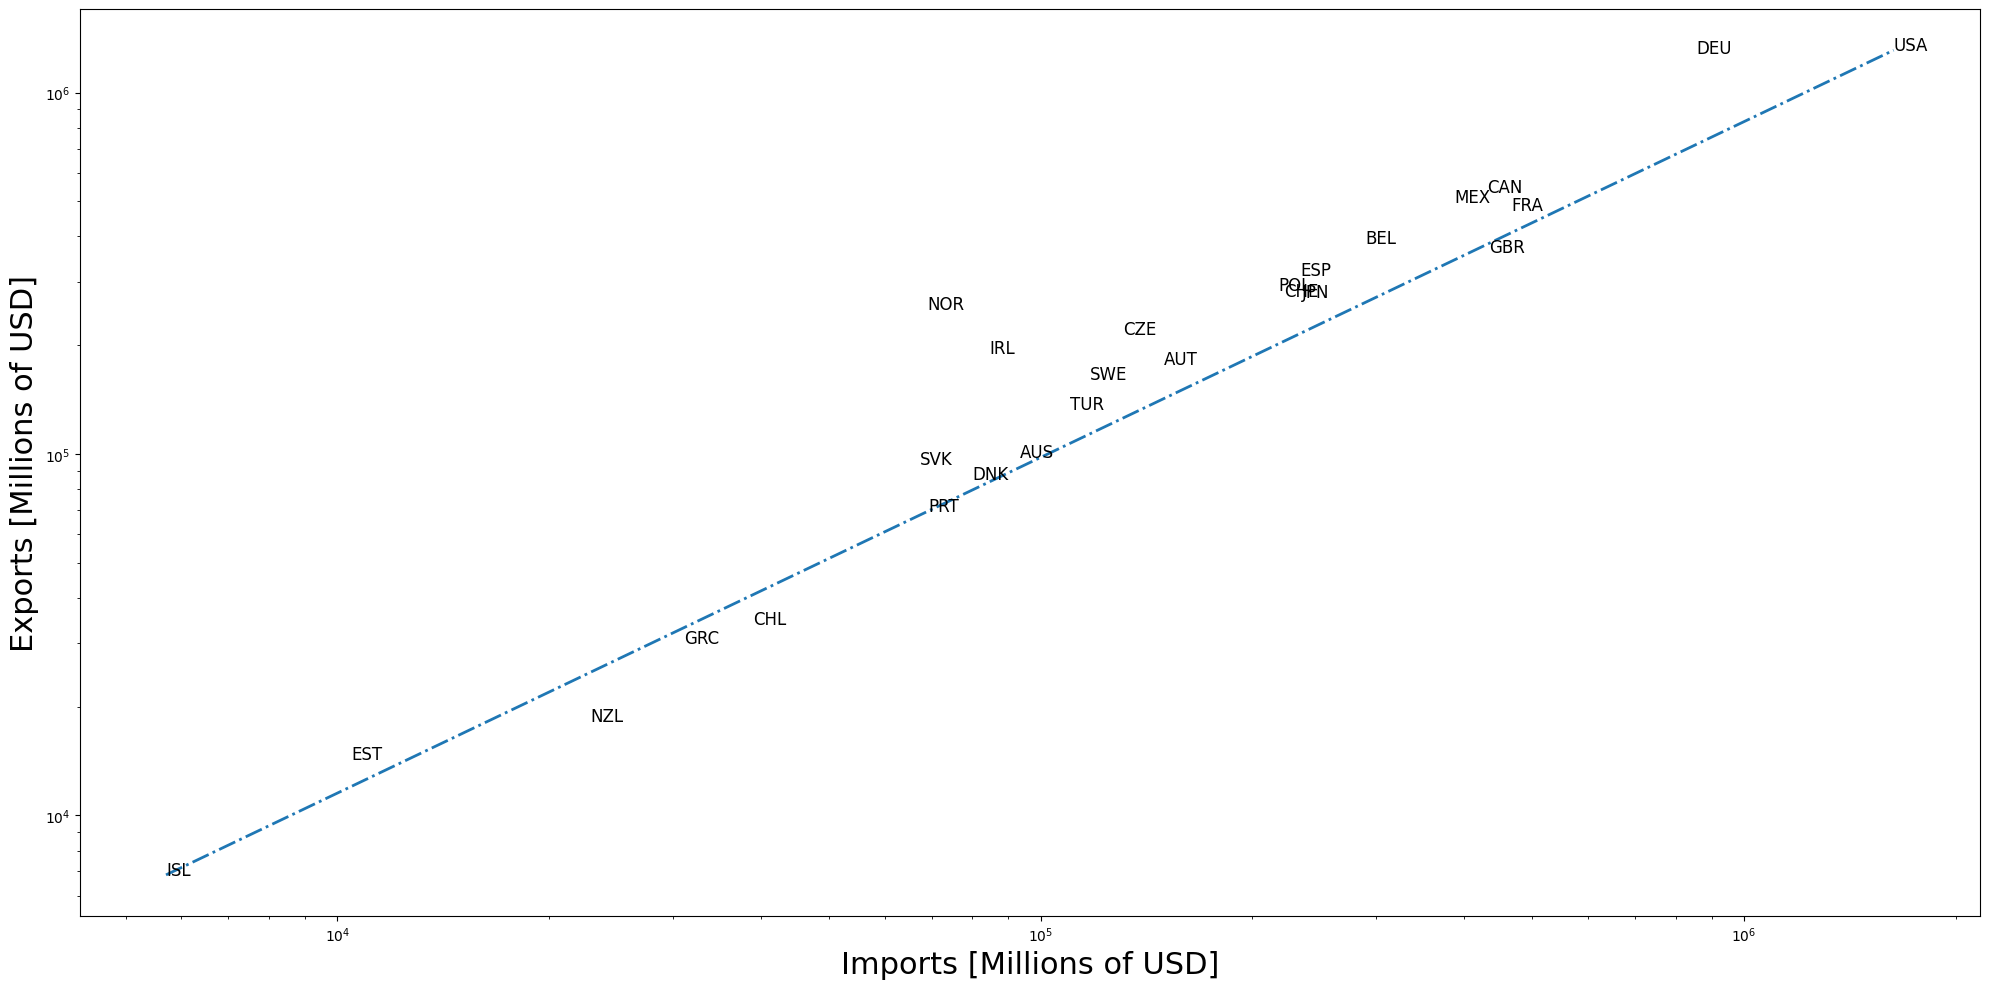

In [42]:
# LEAVE AS-IS: print plots for the newer dataset

plot_scatter( importsNew, exportsNew, "Imports [Millions of USD]", "Exports [Millions of USD]" )

<font size="+1" color="red">Replace this cell with a brief commentary about the plots above with respect to the trade balance (the difference between exports and imports) of various countries.</font>

# DELIVER (individually)

A .zip file containing:

* This notebook.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>